# Customer Segementaion in R

In [1]:
R.version.string

[1] "R version 4.4.1 (2024-06-14)"

Installing necessary packages

In [2]:
install.packages("ggplot2")
install.packages("purr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘purr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


Importing necessary libraries

In [3]:
library(ggplot2)
library(purrr)


Attaching package: ‘purrr’


The following object is masked from ‘package:base’:

    %||%




Loading the dataset

In [4]:
df <- read.csv('/content/Mall_Customers.csv')
head(df)

,CustomerID,Genre,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


Pre-precessing the data

In [5]:
summary(df)

   CustomerID        Genre                Age        Annual.Income..k..
 Min.   :  1.00   Length:200         Min.   :18.00   Min.   : 15.00    
 1st Qu.: 50.75   Class :character   1st Qu.:28.75   1st Qu.: 41.50    
 Median :100.50   Mode  :character   Median :36.00   Median : 61.50    
 Mean   :100.50                      Mean   :38.85   Mean   : 60.56    
 3rd Qu.:150.25                      3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :200.00                      Max.   :70.00   Max.   :137.00    
 Spending.Score..1.100.
 Min.   : 1.00         
 1st Qu.:34.75         
 Median :50.00         
 Mean   :50.20         
 3rd Qu.:73.00         
 Max.   :99.00         

In [6]:
sum(is.na(df))
sum(duplicated(df))

[1] 0

[1] 0

In [7]:
gender <- table(df$Genre)
print(gender)


Female   Male 
   112     88 


Visualisation of data

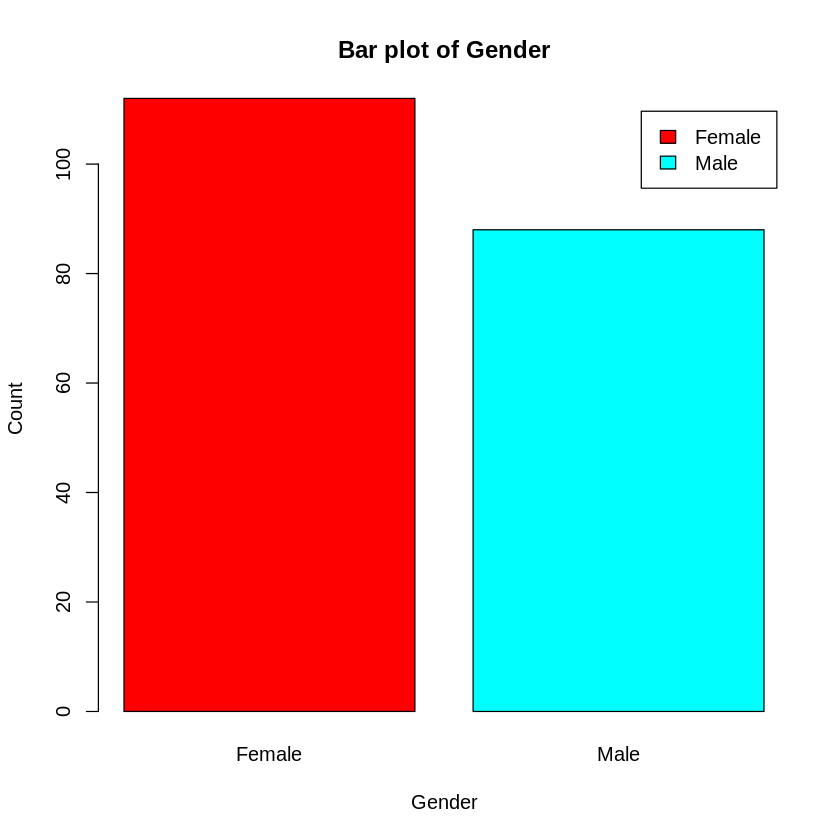

In [8]:
barplot(gender,main='Bar plot of Gender',xlab='Gender',ylab='Count',
        col=rainbow(2),legend=rownames(gender))

In pie-chart


Female   Male 
    56     44 
[1] "Female 56 %" "Male 44 %"  


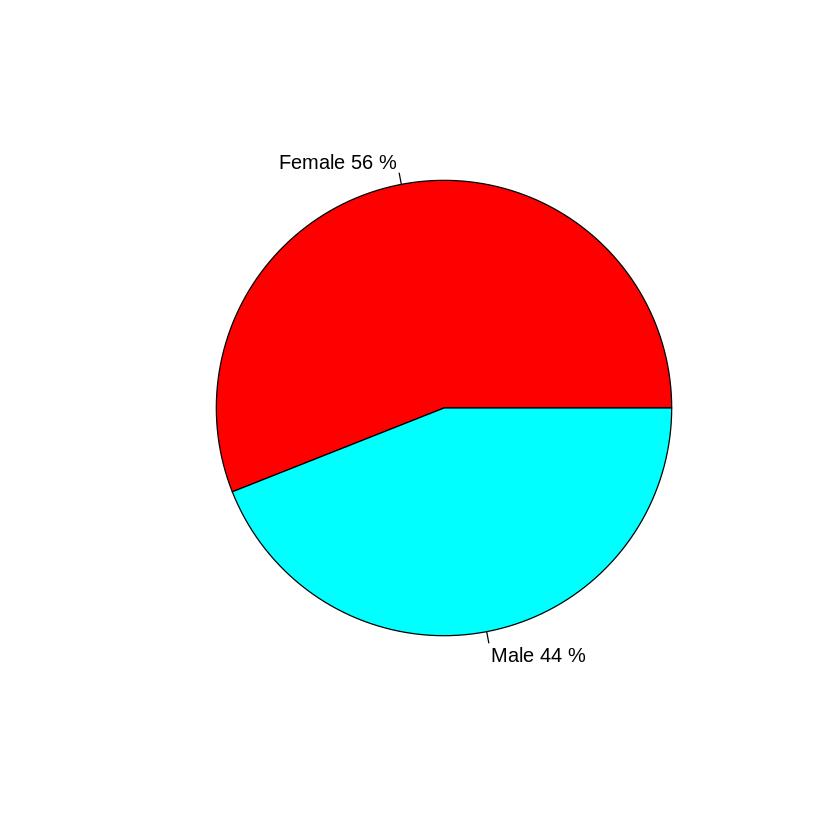

In [9]:
percent <- gender/sum(gender) * 100
print(percent)
labels <- paste(c('Female','Male'),percent,'%')
print(labels)
pie(percent,col=rainbow(2),labels=labels)

Visualisation of age distribution

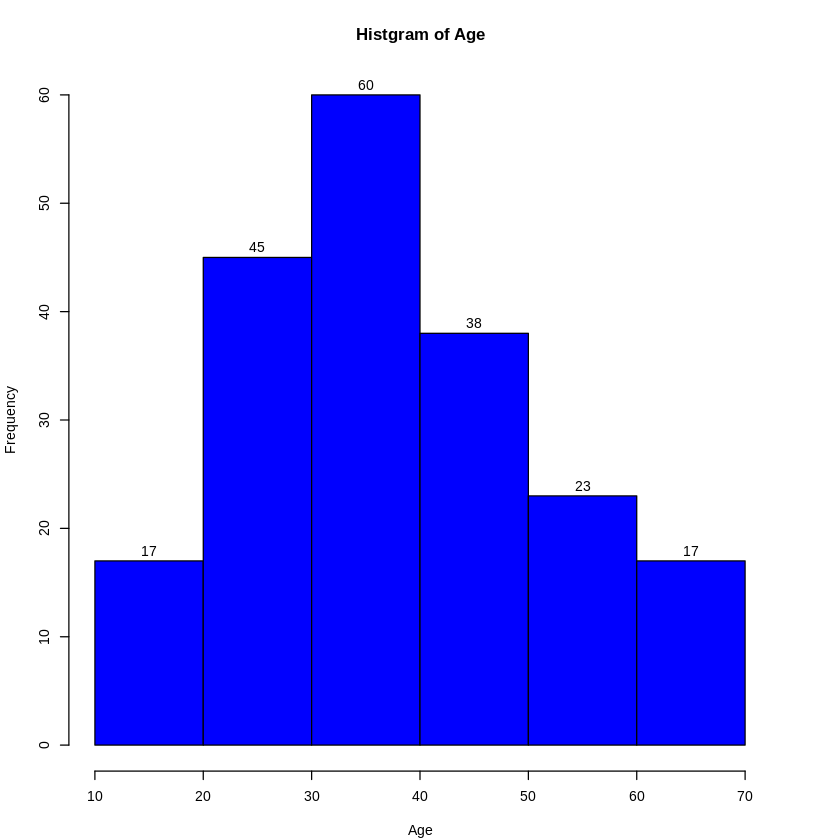

In [10]:
par(mar=c(4, 4, 4, 4) + 0.1, mfrow=c(1, 1), cex=0.7)
hist(df$Age,breaks=5,col='blue',labels=T, main='Histgram of Age',xlab='Age')

For annual income

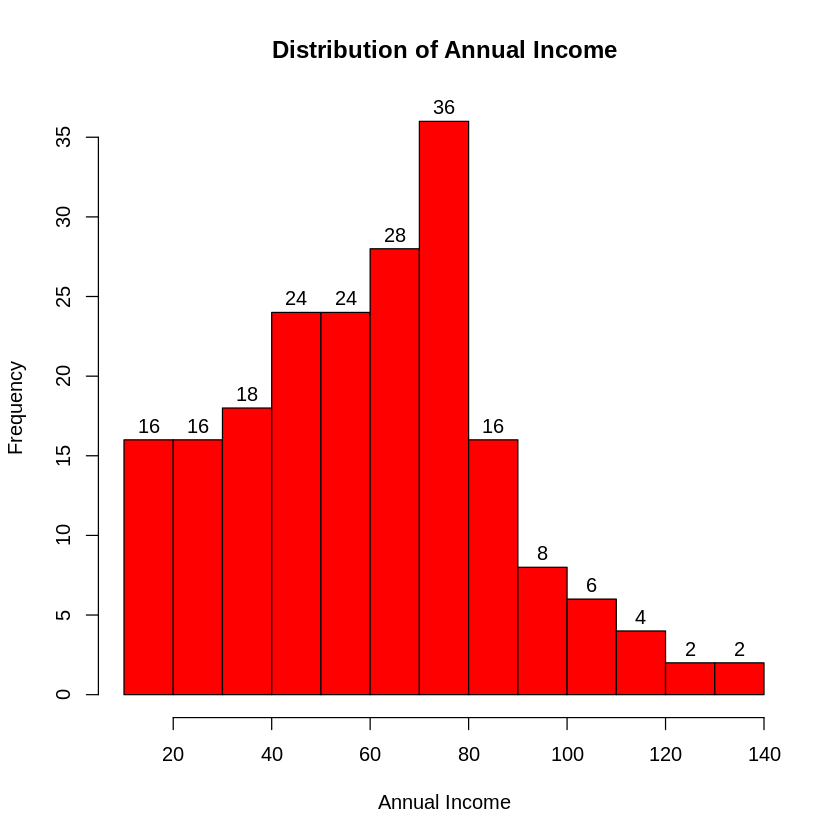

In [11]:
hist(df$Annual.Income..k..,col='red',labels=T,main='Distribution of Annual Income',xlab='Annual Income')

For spending score

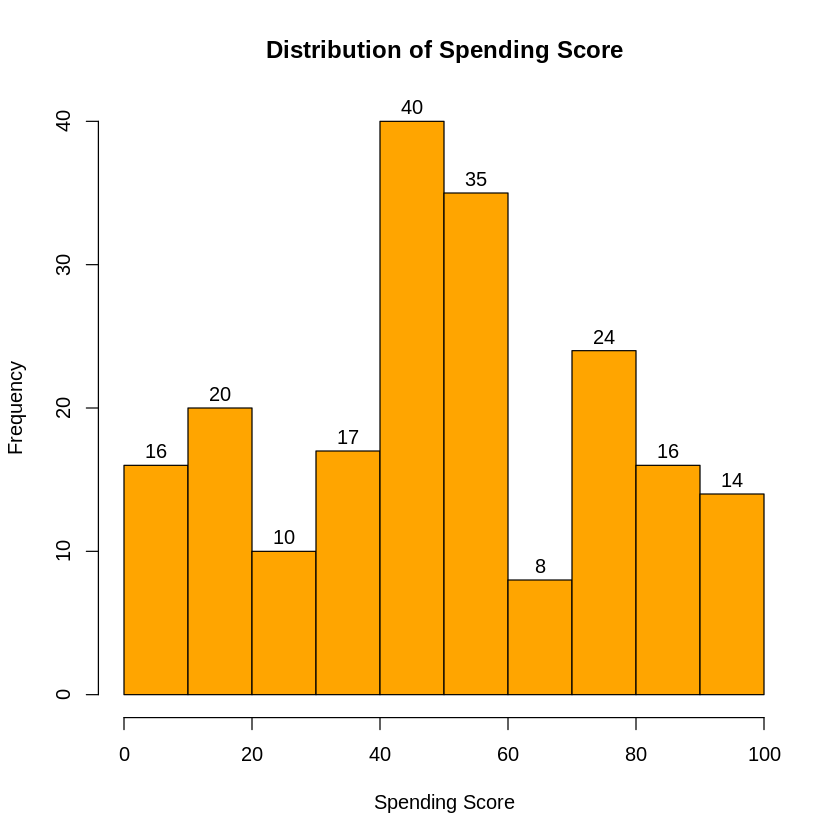

In [12]:
hist(df$Spending.Score..1.100.,col='orange',labels=T,main='Distribution of Spending Score',xlab='Spending Score')

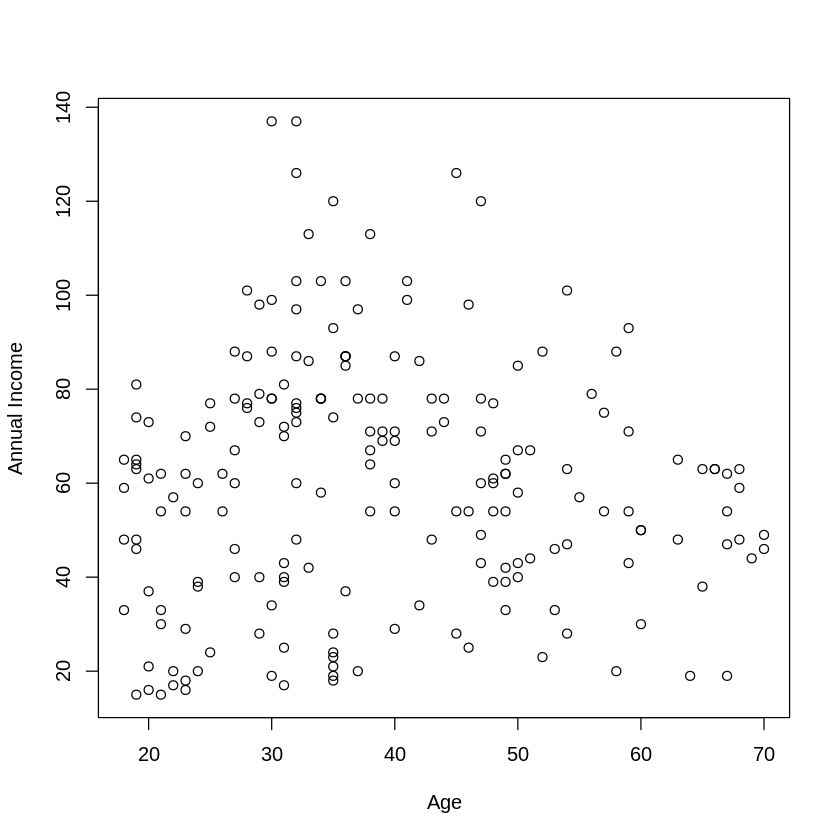

In [13]:
#visualising the relationship between age and annual income
plot(df$Age,df$Annual.Income..k..,col='black',xlab='Age',ylab='Annual Income')

Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”


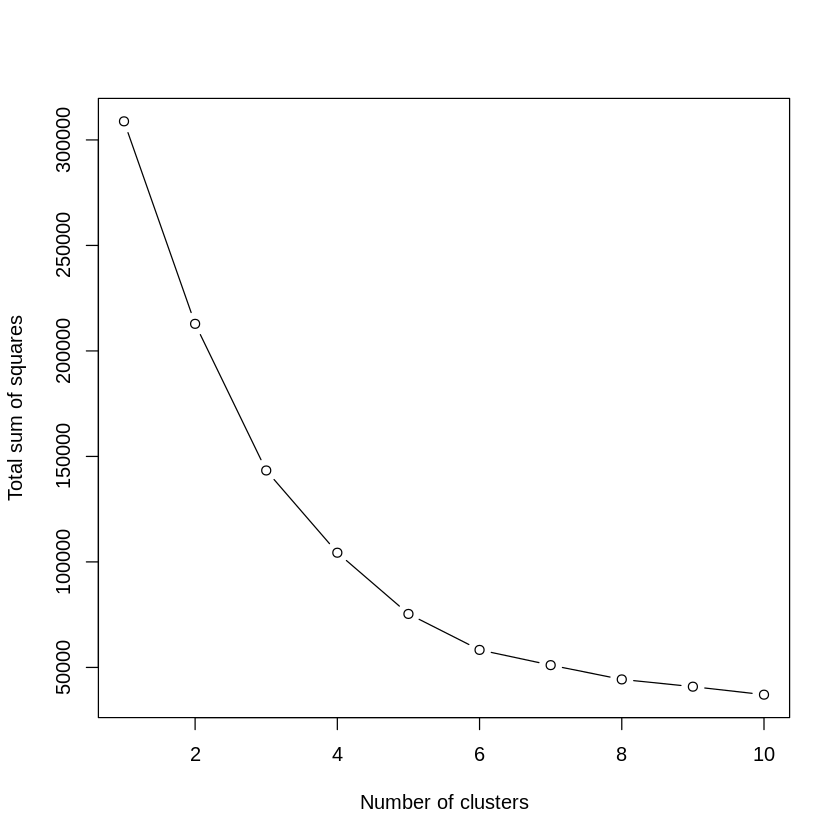

In [14]:
#Using k-means for segmenting customers and determining optimal value using Elbow method
fun <- function(k){
  kmeans(df[,3:5],k,iter.max=100,nstart = 100,algorithm='Lloyd')$tot.withinss
}

k.values <- 1:10
fun_value <- map_dbl(k.values,fun)
plot(k.values,fun_value,type='b',xlab='Number of clusters',ylab='Total sum of squares')

In [15]:
#From the graph, k=5 is the optimal value
k5<- kmeans(df[,3:5],5,iter.max = 100,nstart = 50,algorithm = 'Lloyd')
print(k5)

K-means clustering with 5 clusters of sizes 36, 79, 39, 23, 23

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 40.66667           87.75000               17.58333
2 43.08861           55.29114               49.56962
3 32.69231           86.53846               82.12821
4 45.21739           26.30435               20.91304
5 25.52174           26.30435               78.56522

Clustering vector:
  [1] 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
 [38] 5 4 5 4 5 4 5 4 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
[149] 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
[186] 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3

Within cluster sum of squares by cluster:
[1] 17669.500 30138.051 13972.359  8948.609  4622.261
 (between_SS / total_SS =  75.6 %)

Available comp

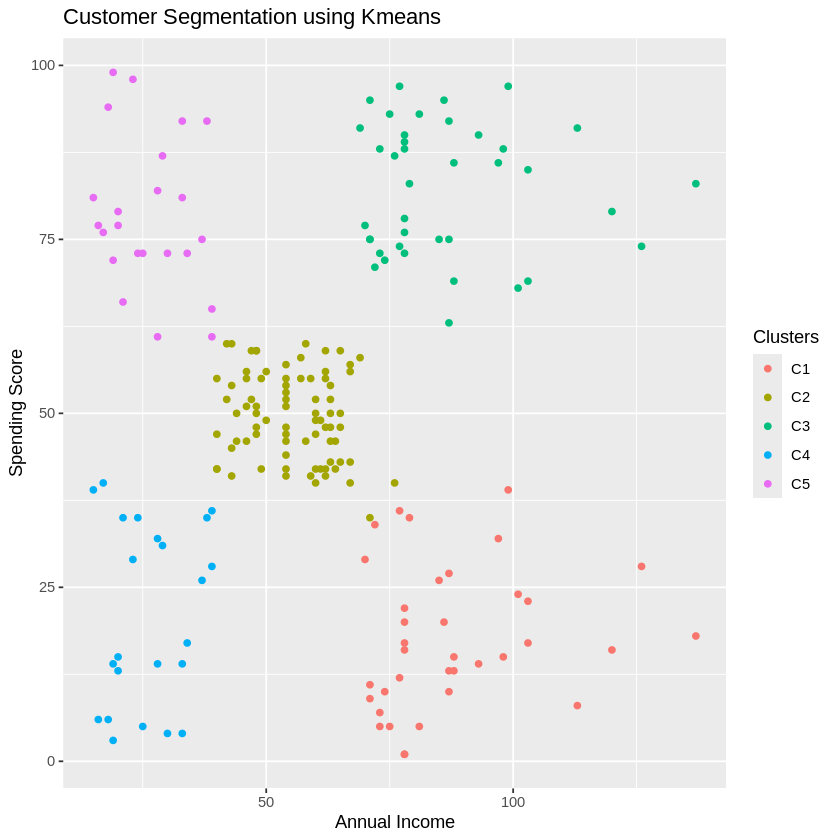

In [16]:
#Visualising cluster results
ggplot(df, aes(x = Annual.Income..k..,y = Spending.Score..1.100.)) +
  geom_point(stat = 'identity',aes(col = as.factor(k5$cluster))) +
  scale_color_discrete(name='Clusters',breaks = c('1','2','3','4','5'),
                       labels = c('C1','C2','C3','C4','C5')) +
  ggtitle('Customer Segmentation using Kmeans') + labs(x='Annual Income', y='Spending Score')